In [57]:
import numpy as np

- We'll build simple neural network, like this one:

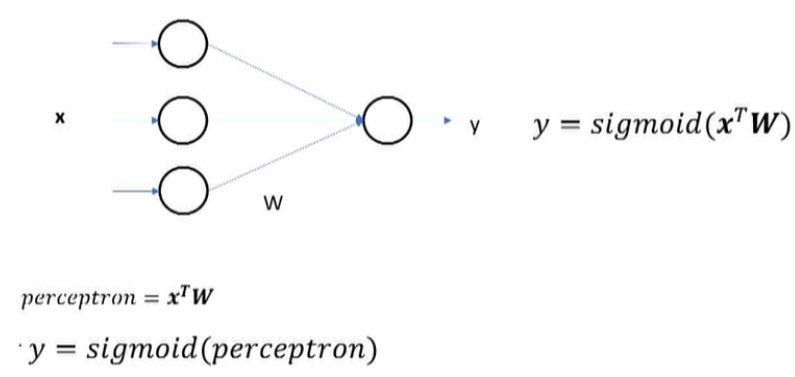

- We need to perform backpropogation for hypertuning of parameter 

> Let Error function be MSE

$$E = MSE = \frac{\sum(\hat{y_i} - y_i) ^ 2 }{n}$$

> And we'll take sigmoid function as our activation function 

$$ Z(x) = \frac{1}{1 + e^{-x}}$$ 

so 

$$
    \frac{\partial{E}}{\partial{W_{11}}} = \frac{\partial{Z_1}}{\partial{W_{11}}} * \frac{\partial{y_1}}{\partial{Z_{1}}} * \frac{\partial{E}}{\partial{y}} 
$$

$$
\frac{\partial{E}}{\partial{W_{11}}} = x * (Z *(1 -Z)) * 2 * (\hat{y} - y)
$$

In [58]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))   

In [59]:
ETA = 0.5 # Learning rate
D = np.array([
    [4, 500, 6],
    [4, 550, 5.5],
    [2, 200, 3.5],
    [2, 250, 4]
])

In [60]:
label = np.array([1, 1, 0, 0]).T   # ground truth 

In [61]:
label

array([1, 1, 0, 0])

In [62]:
# Build weight matrix
np.random.seed(1)
W = np.random.random((3, 1))
W

array([[4.17022005e-01],
       [7.20324493e-01],
       [1.14374817e-04]])

In [63]:
for iter in range(10):
    
    # Forward pass
    input_layer = D
    perceptron = np.dot(input_layer, W)
    # print(perceptron)
    output_layer = 1 / (1 + np.exp(-perceptron))
    
    # print(output_layer)
    mean_square_error = 2 * np.square(np.subtract(output_layer, label)).mean()
    print(mean_square_error)
    
    derivative = perceptron * (1 - perceptron) # derivative of sigmoid function
    gradient = np.dot(input_layer.T, derivative * mean_square_error)
    
    W += ETA * gradient
    print(W)

1.0
[[  -630288.84076976]
 [-82211996.95180038]
 [  -927450.25594021]]
1.0
[[-8.16432693e+21]
 [-1.06490910e+24]
 [-1.20141231e+22]]
1.0
[[-1.36985650e+54]
 [-1.78676414e+56]
 [-2.01579687e+54]]
1.0
[[-3.85642112e+118]
 [-5.03009983e+120]
 [-5.67487296e+118]]
1.0
[[-3.05635085e+247]
 [-3.98653296e+249]
 [-4.49753859e+247]]
1.0
[[-inf]
 [-inf]
 [-inf]]
1.0
[[-inf]
 [-inf]
 [-inf]]
1.0
[[-inf]
 [-inf]
 [-inf]]
1.0
[[-inf]
 [-inf]
 [-inf]]
1.0
[[-inf]
 [-inf]
 [-inf]]


C:\Users\SHOYEB ANSARI\AppData\Local\Temp\ipykernel_12736\3575399397.py:7: RuntimeWarning: overflow encountered in exp
  output_layer = 1 / (1 + np.exp(-perceptron))
C:\Users\SHOYEB ANSARI\AppData\Local\Temp\ipykernel_12736\3575399397.py:13: RuntimeWarning: overflow encountered in multiply
  derivative = perceptron * (1 - perceptron) # derivative of sigmoid function


In [64]:
print(output_layer)

[[0.]
 [0.]
 [0.]
 [0.]]


## Now let's take hidden layer 

- Our neural network will be like this 
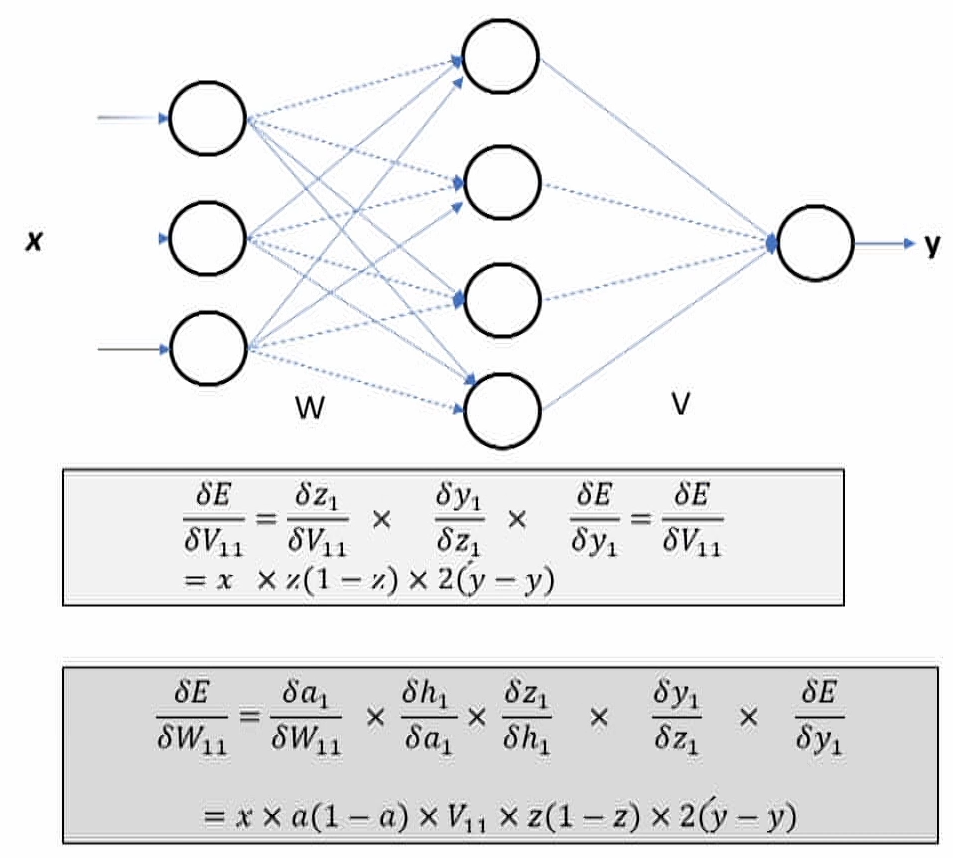

In [66]:
D # Dataset

array([[  4. , 500. ,   6. ],
       [  4. , 550. ,   5.5],
       [  2. , 200. ,   3.5],
       [  2. , 250. ,   4. ]])

In [68]:
# Build weight matrix

# Number of nodes in hidden layer : 4
W = np.random.random((3, 4)) 
V = np.random.random((4, 1))

In [69]:
for iter in range(10):
    # Forward pass
    input_layer = D
    hidden_layer_perceptron = np.dot(input_layer, W)
    hidden_layer = 1 / (1 + np.exp(-hidden_layer_perceptron))
    
    # from hidden layer to output layer
    output_layer_perceptron = np.dot(hidden_layer, V)
    output_layer = 1 / (1 + np.exp(-output_layer_perceptron))
    
    # Backpropogation
    mean_square_error = 2 * np.square(np.subtract(output_layer, label)).mean()
    
    output_derivative = output_layer_perceptron * (1 - output_layer_perceptron)
    v_gradient = np.dot(output_layer.T, output_derivative * mean_square_error)
    V += ETA * v_gradient
    
    hidden_derivative = hidden_layer_perceptron * (1 - hidden_layer_perceptron)
    w_gradient = np.dot(input_layer.T, hidden_derivative * V * output_derivative * mean_square_error)
    
    W += ETA * w_gradient
    print(W)

[[-5.99712172e+02 -9.03023118e+03 -1.31725237e+04 -1.35575062e+03]
 [-8.14833237e+04 -1.22359709e+06 -1.78476009e+06 -1.83531258e+05]
 [-8.58912691e+02 -1.29422776e+04 -1.88798720e+04 -1.94431794e+03]]
[[-5.99712172e+02 -9.03023118e+03 -1.31725237e+04 -1.35575062e+03]
 [-8.14833237e+04 -1.22359709e+06 -1.78476009e+06 -1.83531258e+05]
 [-8.58912691e+02 -1.29422776e+04 -1.88798720e+04 -1.94431794e+03]]
[[-5.99712172e+02 -9.03023118e+03 -1.31725237e+04 -1.35575062e+03]
 [-8.14833237e+04 -1.22359709e+06 -1.78476009e+06 -1.83531258e+05]
 [-8.58912691e+02 -1.29422776e+04 -1.88798720e+04 -1.94431794e+03]]
[[-5.99712172e+02 -9.03023118e+03 -1.31725237e+04 -1.35575062e+03]
 [-8.14833237e+04 -1.22359709e+06 -1.78476009e+06 -1.83531258e+05]
 [-8.58912691e+02 -1.29422776e+04 -1.88798720e+04 -1.94431794e+03]]
[[-5.99712172e+02 -9.03023118e+03 -1.31725237e+04 -1.35575062e+03]
 [-8.14833237e+04 -1.22359709e+06 -1.78476009e+06 -1.83531258e+05]
 [-8.58912691e+02 -1.29422776e+04 -1.88798720e+04 -1.94431

C:\Users\SHOYEB ANSARI\AppData\Local\Temp\ipykernel_12736\659558097.py:5: RuntimeWarning: overflow encountered in exp
  hidden_layer = 1 / (1 + np.exp(-hidden_layer_perceptron))


In [70]:
print(output_layer)

[[0.5]
 [0.5]
 [0.5]
 [0.5]]
